<a href="https://colab.research.google.com/github/sukumar1612/fitness_tracker/blob/feature_saket/fitness_tracker/machine_learning/SparkMLCaloriesBurnt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyspark

     |████████████████████████████████| 281.3 MB 37 kB/s 
     |████████████████████████████████| 198 kB 63.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=8fe511db630f5c2f46a24d79e4aa9bba338c0bb46ef5744eed2af525ee0376ab
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [2]:
pip freeze

absl-py==0.12.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
appdirs==1.4.4
argcomplete==1.12.3
argon2-cffi==21.1.0
arviz==0.11.4
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
atari-py==0.2.9
atomicwrites==1.4.0
attrs==21.2.0
audioread==2.1.9
autograd==1.3
Babel==2.9.1
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==4.1.0
blis==0.4.1
bokeh==2.3.3
Bottleneck==1.3.2
branca==0.4.2
bs4==0.0.1
CacheControl==0.12.10
cached-property==1.5.2
cachetools==4.2.4
catalogue==1.0.0
certifi==2021.10.8
cffi==1.15.0
cftime==1.5.1.1
chardet==3.0.4
charset-normalizer==2.0.7
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorcet==2.0.6
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.3.2
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.2.7
cvxpy==1.0.31
cycler==0.11.0
cymem==2.0.6
Cython==0.29.24
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
descartes==1.1.0
dill==0.3.4
distributed==1.25.3


In [4]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('data').getOrCreate()
caloriedf = spark.read.csv('exercise.csv',inferSchema=True,header=True)
caloriedf.show()

+--------+------+---+------+------+--------+----------+---------+--------+
| User_ID|Gender|Age|Height|Weight|Duration|Heart_Rate|Body_Temp|Calories|
+--------+------+---+------+------+--------+----------+---------+--------+
|14733363|  male| 68|   190|    94|      29|       105|     40.8|     231|
|14861698|female| 20|   166|    60|      14|        94|     40.3|      66|
|11179863|  male| 69|   179|    79|       5|        88|     38.7|      26|
|16180408|female| 34|   179|    71|      13|       100|     40.5|      71|
|17771927|female| 27|   154|    58|      10|        81|     39.8|      35|
|15130815|female| 36|   151|    50|      23|        96|     40.7|     123|
|19602372|female| 33|   158|    56|      22|        95|     40.5|     112|
|11117088|  male| 41|   175|    85|      25|       100|     40.7|     143|
|12132339|  male| 60|   186|    94|      21|        97|     40.4|     134|
|17964668|female| 26|   146|    51|      16|        90|     40.2|      72|
|13723164|female| 36|   1

In [5]:
from pyspark.ml.feature import StandardScaler

In [6]:
type(caloriedf)

pyspark.sql.dataframe.DataFrame

In [7]:
 caloriedf.printSchema()

root
 |-- User_ID: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Height: integer (nullable = true)
 |-- Weight: integer (nullable = true)
 |-- Duration: integer (nullable = true)
 |-- Heart_Rate: integer (nullable = true)
 |-- Body_Temp: double (nullable = true)
 |-- Calories: integer (nullable = true)



In [8]:
calorie_pd=caloriedf.toPandas()

In [9]:
calorie_pd

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193,86,11,92,40.4,45
14996,17212577,female,27,165,65,6,85,39.2,23
14997,17271188,female,43,159,58,16,90,40.1,75
14998,18643037,male,78,193,97,2,84,38.3,11


In [10]:
import seaborn as sns

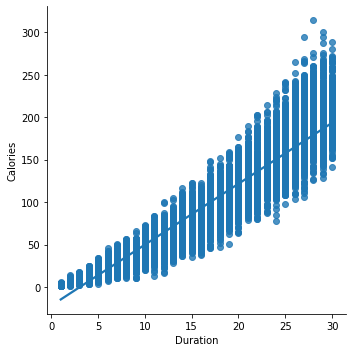

In [11]:
sns.lmplot(x="Duration",y="Calories",data=calorie_pd)

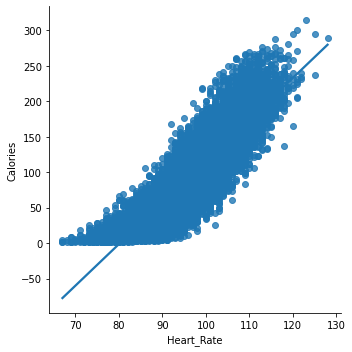

In [12]:
sns.lmplot(x="Heart_Rate",y="Calories",data=calorie_pd)

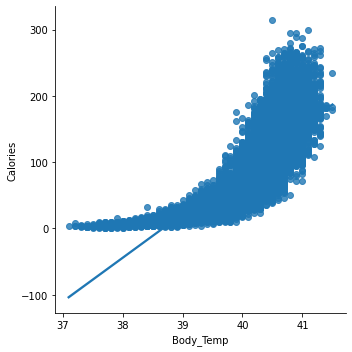

In [13]:
sns.lmplot(x="Body_Temp",y="Calories",data=calorie_pd)

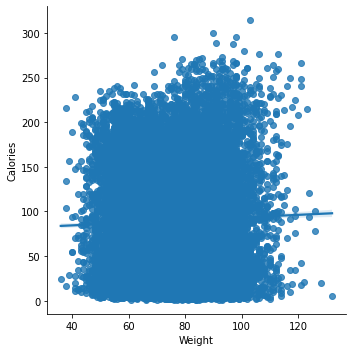

In [14]:
sns.lmplot(x="Weight",y="Calories",data=calorie_pd)

In [15]:
caloriedf=caloriedf.replace("male","0")
caloriedf=caloriedf.replace("female","1")
caloriedf.show()

+--------+------+---+------+------+--------+----------+---------+--------+
| User_ID|Gender|Age|Height|Weight|Duration|Heart_Rate|Body_Temp|Calories|
+--------+------+---+------+------+--------+----------+---------+--------+
|14733363|     0| 68|   190|    94|      29|       105|     40.8|     231|
|14861698|     1| 20|   166|    60|      14|        94|     40.3|      66|
|11179863|     0| 69|   179|    79|       5|        88|     38.7|      26|
|16180408|     1| 34|   179|    71|      13|       100|     40.5|      71|
|17771927|     1| 27|   154|    58|      10|        81|     39.8|      35|
|15130815|     1| 36|   151|    50|      23|        96|     40.7|     123|
|19602372|     1| 33|   158|    56|      22|        95|     40.5|     112|
|11117088|     0| 41|   175|    85|      25|       100|     40.7|     143|
|12132339|     0| 60|   186|    94|      21|        97|     40.4|     134|
|17964668|     1| 26|   146|    51|      16|        90|     40.2|      72|
|13723164|     1| 36|   1

In [16]:
from pyspark.sql.types import IntegerType,BooleanType,DateType

In [17]:
caloriedf=caloriedf.withColumn("Gender",caloriedf.Gender.cast(IntegerType()))
caloriedf.show()
caloriedf.printSchema()
schema1=caloriedf.schema

+--------+------+---+------+------+--------+----------+---------+--------+
| User_ID|Gender|Age|Height|Weight|Duration|Heart_Rate|Body_Temp|Calories|
+--------+------+---+------+------+--------+----------+---------+--------+
|14733363|     0| 68|   190|    94|      29|       105|     40.8|     231|
|14861698|     1| 20|   166|    60|      14|        94|     40.3|      66|
|11179863|     0| 69|   179|    79|       5|        88|     38.7|      26|
|16180408|     1| 34|   179|    71|      13|       100|     40.5|      71|
|17771927|     1| 27|   154|    58|      10|        81|     39.8|      35|
|15130815|     1| 36|   151|    50|      23|        96|     40.7|     123|
|19602372|     1| 33|   158|    56|      22|        95|     40.5|     112|
|11117088|     0| 41|   175|    85|      25|       100|     40.7|     143|
|12132339|     0| 60|   186|    94|      21|        97|     40.4|     134|
|17964668|     1| 26|   146|    51|      16|        90|     40.2|      72|
|13723164|     1| 36|   1

In [18]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [19]:
featureassembler=VectorAssembler(inputCols=["Gender","Age","Height","Weight","Duration","Heart_Rate","Body_Temp"],outputCol="Independent Features")

In [20]:
output=featureassembler.transform(caloriedf)

In [21]:
output.show()

+--------+------+---+------+------+--------+----------+---------+--------+--------------------+
| User_ID|Gender|Age|Height|Weight|Duration|Heart_Rate|Body_Temp|Calories|Independent Features|
+--------+------+---+------+------+--------+----------+---------+--------+--------------------+
|14733363|     0| 68|   190|    94|      29|       105|     40.8|     231|[0.0,68.0,190.0,9...|
|14861698|     1| 20|   166|    60|      14|        94|     40.3|      66|[1.0,20.0,166.0,6...|
|11179863|     0| 69|   179|    79|       5|        88|     38.7|      26|[0.0,69.0,179.0,7...|
|16180408|     1| 34|   179|    71|      13|       100|     40.5|      71|[1.0,34.0,179.0,7...|
|17771927|     1| 27|   154|    58|      10|        81|     39.8|      35|[1.0,27.0,154.0,5...|
|15130815|     1| 36|   151|    50|      23|        96|     40.7|     123|[1.0,36.0,151.0,5...|
|19602372|     1| 33|   158|    56|      22|        95|     40.5|     112|[1.0,33.0,158.0,5...|
|11117088|     0| 41|   175|    85|     

In [22]:
output.select("Independent Features").show()

+--------------------+
|Independent Features|
+--------------------+
|[0.0,68.0,190.0,9...|
|[1.0,20.0,166.0,6...|
|[0.0,69.0,179.0,7...|
|[1.0,34.0,179.0,7...|
|[1.0,27.0,154.0,5...|
|[1.0,36.0,151.0,5...|
|[1.0,33.0,158.0,5...|
|[0.0,41.0,175.0,8...|
|[0.0,60.0,186.0,9...|
|[1.0,26.0,146.0,5...|
|[1.0,36.0,177.0,7...|
|[1.0,21.0,157.0,5...|
|[0.0,66.0,171.0,7...|
|[1.0,32.0,157.0,5...|
|[0.0,53.0,182.0,8...|
|[1.0,39.0,156.0,6...|
|[0.0,39.0,182.0,8...|
|[0.0,46.0,169.0,6...|
|[1.0,27.0,171.0,6...|
|[0.0,50.0,188.0,8...|
+--------------------+
only showing top 20 rows



In [23]:
output.columns

['User_ID',
 'Gender',
 'Age',
 'Height',
 'Weight',
 'Duration',
 'Heart_Rate',
 'Body_Temp',
 'Calories',
 'Independent Features']

In [24]:
finalized_data=output.select("Independent Features","Calories")

In [25]:
finalized_data.show()

+--------------------+--------+
|Independent Features|Calories|
+--------------------+--------+
|[0.0,68.0,190.0,9...|     231|
|[1.0,20.0,166.0,6...|      66|
|[0.0,69.0,179.0,7...|      26|
|[1.0,34.0,179.0,7...|      71|
|[1.0,27.0,154.0,5...|      35|
|[1.0,36.0,151.0,5...|     123|
|[1.0,33.0,158.0,5...|     112|
|[0.0,41.0,175.0,8...|     143|
|[0.0,60.0,186.0,9...|     134|
|[1.0,26.0,146.0,5...|      72|
|[1.0,36.0,177.0,7...|       3|
|[1.0,21.0,157.0,5...|      92|
|[0.0,66.0,171.0,7...|      58|
|[1.0,32.0,157.0,5...|      88|
|[0.0,53.0,182.0,8...|       7|
|[1.0,39.0,156.0,6...|     170|
|[0.0,39.0,182.0,8...|      11|
|[0.0,46.0,169.0,6...|      43|
|[1.0,27.0,171.0,6...|      15|
|[0.0,50.0,188.0,8...|      74|
+--------------------+--------+
only showing top 20 rows



In [26]:
train_data,test_data=finalized_data.randomSplit([0.75,0.25])

In [27]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

In [28]:
regressor=LinearRegression(featuresCol='Independent Features', labelCol='Calories')
regressor=regressor.fit(train_data)

In [29]:
regressor.coefficients

DenseVector([1.1501, 0.4995, -0.1931, 0.3078, 6.6617, 1.9802, -17.1487])

In [30]:
regressor.intercept

472.011746136485

In [31]:
pred_results=regressor.evaluate(test_data)

In [32]:
pred_results.predictions.show(40)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


+--------------------+--------+-------------------+
|Independent Features|Calories|         prediction|
+--------------------+--------+-------------------+
|[0.0,20.0,163.0,6...|       2| -17.24470712736047|
|[0.0,20.0,166.0,6...|      14|  4.301541730191786|
|[0.0,20.0,166.0,7...|      21| 28.018482466418106|
|[0.0,20.0,167.0,6...|      35|  38.81417372187235|
|[0.0,20.0,167.0,6...|      29| 25.798617604541846|
|[0.0,20.0,168.0,7...|      17| 12.586610050956722|
|[0.0,20.0,170.0,7...|     134| 154.71102163860024|
|[0.0,20.0,173.0,7...|      55|  65.43557205597222|
|[0.0,20.0,173.0,7...|       4|-0.8759409591322651|
|[0.0,20.0,173.0,7...|      31| 31.568356537334807|
|[0.0,20.0,173.0,7...|       3|  -9.23826361800127|
|[0.0,20.0,174.0,6...|      69|  84.14878752907748|
|[0.0,20.0,176.0,7...|       4| -6.642145030492486|
|[0.0,20.0,176.0,7...|      72|   81.1008006571684|
|[0.0,20.0,176.0,8...|      86|  99.75039045173509|
|[0.0,20.0,177.0,7...|       6| 1.1326023545995554|
|[0.0,20.0,1

In [35]:
from pyspark.ml.regression import RandomForestRegressor

In [36]:
randomforestregressor=RandomForestRegressor(featuresCol='Independent Features', labelCol='Calories')
randomforestregressor=randomforestregressor.fit(train_data)

In [37]:
forestpred=randomforestregressor.transform(test_data)

In [38]:
forestpred.show(40)

+--------------------+--------+------------------+
|Independent Features|Calories|        prediction|
+--------------------+--------+------------------+
|[0.0,20.0,163.0,6...|       2|  8.69269895377587|
|[0.0,20.0,166.0,6...|      14| 34.36761199885351|
|[0.0,20.0,166.0,7...|      21| 26.99893011469548|
|[0.0,20.0,167.0,6...|      35| 58.62117319520394|
|[0.0,20.0,167.0,6...|      29| 55.63280039815122|
|[0.0,20.0,168.0,7...|      17|25.626103121358785|
|[0.0,20.0,170.0,7...|     134|157.77110793727974|
|[0.0,20.0,173.0,7...|      55| 71.97857176779334|
|[0.0,20.0,173.0,7...|       4| 8.187589703686228|
|[0.0,20.0,173.0,7...|      31| 48.25220665432086|
|[0.0,20.0,173.0,7...|       3| 7.638248494717587|
|[0.0,20.0,174.0,6...|      69| 89.38270417543427|
|[0.0,20.0,176.0,7...|       4| 9.402837572781978|
|[0.0,20.0,176.0,7...|      72|106.71995686564814|
|[0.0,20.0,176.0,8...|      86|103.25242940940659|
|[0.0,20.0,177.0,7...|       6|12.704494701903583|
|[0.0,20.0,178.0,7...|      45|

In [39]:
evaluator = RegressionEvaluator(labelCol="Calories", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(forestpred)

In [40]:
print(rmse)

10.228071585770543


In [41]:
from pyspark.ml.regression import GBTRegressor

In [42]:
gbt=GBTRegressor(featuresCol='Independent Features', labelCol='Calories')

In [43]:
gbt=gbt.fit(train_data)

In [44]:
gbtpred=gbt.transform(test_data)

In [45]:
gbtpred.show()

+--------------------+--------+--------------------+
|Independent Features|Calories|          prediction|
+--------------------+--------+--------------------+
|[0.0,20.0,163.0,6...|       2|  -0.573755808471853|
|[0.0,20.0,166.0,6...|      14|  15.927959633921871|
|[0.0,20.0,166.0,7...|      21|    19.1751072567441|
|[0.0,20.0,167.0,6...|      35|  31.703643749426725|
|[0.0,20.0,167.0,6...|      29|  31.070769186712788|
|[0.0,20.0,168.0,7...|      17|   17.68962238559287|
|[0.0,20.0,170.0,7...|     134|  143.23989179230438|
|[0.0,20.0,173.0,7...|      55|   54.20681471040923|
|[0.0,20.0,173.0,7...|       4|  -0.573755808471853|
|[0.0,20.0,173.0,7...|      31|  27.772608695331208|
|[0.0,20.0,173.0,7...|       3|-0.46469993846816404|
|[0.0,20.0,174.0,6...|      69|   75.09200571964783|
|[0.0,20.0,176.0,7...|       4|-0.07797717434334409|
|[0.0,20.0,176.0,7...|      72|   72.78341009858777|
|[0.0,20.0,176.0,8...|      86|   99.61452520932546|
|[0.0,20.0,177.0,7...|       6|   0.6428941546

In [46]:
evaluator = RegressionEvaluator(
    labelCol="Calories", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(gbtpred)

In [48]:
rmse

7.045910911353158

In [51]:
data=[[11117088,1,20,166,60,14,94,40.3,0]]
rdd = spark.sparkContext.parallelize(data)

In [53]:
df = spark.createDataFrame(rdd,schema1)

In [55]:
df.show()

+--------+------+---+------+------+--------+----------+---------+--------+
| User_ID|Gender|Age|Height|Weight|Duration|Heart_Rate|Body_Temp|Calories|
+--------+------+---+------+------+--------+----------+---------+--------+
|11117088|     1| 20|   166|    60|      14|        94|     40.3|       0|
+--------+------+---+------+------+--------+----------+---------+--------+



In [59]:
df1=featureassembler.transform(df)

In [76]:
pandasdf=gbt.transform(df1).toPandas()

In [77]:
pandasdf

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Independent Features,prediction
0,11117088,1,20,166,60,14,94,40.3,0,"[1.0, 20.0, 166.0, 60.0, 14.0, 94.0, 40.3]",67.62061


In [82]:
print(pandasdf.iloc[0]['prediction'])

67.62060951591543


In [83]:
print(type(gbt))

<class 'pyspark.ml.regression.GBTRegressionModel'>


In [84]:
from pyspark.ml.regression import GBTRegressionModel

In [85]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [89]:
gbt.save("/content/drive/My Drive/caloriemodelfilefinalsav")

In [93]:
persistedModel = GBTRegressionModel.load("/content/drive/My Drive/caloriemodelfilefinalsav")

In [94]:
data=[[11117088,1,20,166,60,14,94,40.3,0]]
rdd = spark.sparkContext.parallelize(data)

In [95]:
df = spark.createDataFrame(rdd,schema1)

In [96]:
df.show()

+--------+------+---+------+------+--------+----------+---------+--------+
| User_ID|Gender|Age|Height|Weight|Duration|Heart_Rate|Body_Temp|Calories|
+--------+------+---+------+------+--------+----------+---------+--------+
|11117088|     1| 20|   166|    60|      14|        94|     40.3|       0|
+--------+------+---+------+------+--------+----------+---------+--------+



In [97]:
df1=featureassembler.transform(df)

In [98]:
df1.show()

+--------+------+---+------+------+--------+----------+---------+--------+--------------------+
| User_ID|Gender|Age|Height|Weight|Duration|Heart_Rate|Body_Temp|Calories|Independent Features|
+--------+------+---+------+------+--------+----------+---------+--------+--------------------+
|11117088|     1| 20|   166|    60|      14|        94|     40.3|       0|[1.0,20.0,166.0,6...|
+--------+------+---+------+------+--------+----------+---------+--------+--------------------+



In [99]:
persistedModel.transform(df1).show()

+--------+------+---+------+------+--------+----------+---------+--------+--------------------+-----------------+
| User_ID|Gender|Age|Height|Weight|Duration|Heart_Rate|Body_Temp|Calories|Independent Features|       prediction|
+--------+------+---+------+------+--------+----------+---------+--------+--------------------+-----------------+
|11117088|     1| 20|   166|    60|      14|        94|     40.3|       0|[1.0,20.0,166.0,6...|67.62060951591543|
+--------+------+---+------+------+--------+----------+---------+--------+--------------------+-----------------+



In [100]:
persistedModel

GBTRegressionModel: uid=GBTRegressor_b8be8dc6fd67, numTrees=20, numFeatures=7

In [101]:
gbtpred_pd=gbtpred.toPandas()

In [102]:
gbtpred_pd['prediction'].min()

-0.573755808471853

In [103]:
gbtpred_pd[gbtpred_pd["prediction"]<0]

,Independent Features,Calories,prediction
0,"[0.0, 20.0, 163.0, 69.0, 2.0, 78.0, 38.3]",2,-0.573756
8,"[0.0, 20.0, 173.0, 74.0, 2.0, 83.0, 37.9]",4,-0.573756
10,"[0.0, 20.0, 173.0, 79.0, 2.0, 78.0, 37.9]",3,-0.464700
12,"[0.0, 20.0, 176.0, 73.0, 2.0, 84.0, 38.3]",4,-0.077977
237,"[0.0, 24.0, 173.0, 70.0, 1.0, 79.0, 37.7]",1,-0.573756


In [104]:
caloriedf.printSchema()

root
 |-- User_ID: integer (nullable = true)
 |-- Gender: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Height: integer (nullable = true)
 |-- Weight: integer (nullable = true)
 |-- Duration: integer (nullable = true)
 |-- Heart_Rate: integer (nullable = true)
 |-- Body_Temp: double (nullable = true)
 |-- Calories: integer (nullable = true)

